In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
try:
    import seaborn as sns
    tit = sns.load_dataset('titanic')
    print("Loaded titanic via seaborn")
except Exception as e:
    print("seaborn не доступен, попытаемся из URL")
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    tit = pd.read_csv(url)
    print("Loaded titanic via URL")

print("\nShape:", tit.shape)
print("Columns:", tit.columns.tolist())

Loaded titanic via seaborn

Shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [79]:
pd.set_option('display.max_rows', 15)
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [80]:
print("Пропуски по колонкам:\n", tit.isna().sum().sort_values(ascending=False))

Пропуски по колонкам:
 deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64


In [81]:
print("age stats (before):\n", tit['age'].describe())

# заполним медианой как базовое решение
if tit['age'].isna().sum() > 0:
    tit['age_filled'] = tit['age'].fillna(tit['age'].median())
    print("Заполнили age медианой; пропусков осталось:", tit['age_filled'].isna().sum())
else:
    tit['age_filled'] = tit['age']

age stats (before):
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64
Заполнили age медианой; пропусков осталось: 0


In [82]:
df_work = tit.copy()

results = {}

if 'survived' in df_work.columns:
    results['survival_rate_overall'] = df_work['survived'].mean()
    results['survival_by_sex'] = df_work.groupby('sex')['survived'].mean().to_dict()
    results['survival_by_pclass'] = df_work.groupby('pclass')['survived'].mean().to_dict()

results['median_age_by_pclass'] = df_work.groupby('pclass')['age_filled'].median().to_dict()

print("Results (sample):")
for k,v in results.items():
    print(k, ":", v)

res_df = pd.DataFrame({
    'metric': list(results.keys()),
    'value': [str(v) for v in results.values()]
})
out_name = 'titanic_analysis_example.csv'
res_df.to_csv(out_name, index=False)
print("\nSaved report to", out_name)

Results (sample):
survival_rate_overall : 0.3838383838383838
survival_by_sex : {'female': 0.7420382165605095, 'male': 0.18890814558058924}
survival_by_pclass : {1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}
median_age_by_pclass : {1: 35.0, 2: 28.0, 3: 28.0}

Saved report to titanic_analysis_example.csv


* ДЗ

In [83]:
t5 = tit.sort_values(by='fare', ascending=False).head(5)
print('5 самых дорогих билетов:', )
print(t5[['pclass', 'survived', 'fare']])

5 самых дорогих билетов:
     pclass  survived      fare
679       1         1  512.3292
258       1         1  512.3292
737       1         1  512.3292
88        1         1  263.0000
438       1         0  263.0000


In [84]:
unique_embarked = tit['embarked'].nunique()
print("Число уникальных портов посадки:", unique_embarked)

Число уникальных портов посадки: 3


In [85]:
tit['family_size'] = tit['sibsp'] + tit['parch'] + 1
survival_by_family = df.groupby('family_size')['survived'].mean().reset_index()
survival_by_family.columns = ['family_size', 'survival_rate']
print("Связь family_size с survived (средняя выживаемость):")
print(survival_by_family)

Связь family_size с survived (средняя выживаемость):
   family_size  survival_rate
0            1       0.303538
1            2       0.552795
2            3       0.578431
3            4       0.724138
4            5       0.200000
5            6       0.136364
6            7       0.333333
7            8       0.000000
8           11       0.000000


* ДЗ 2

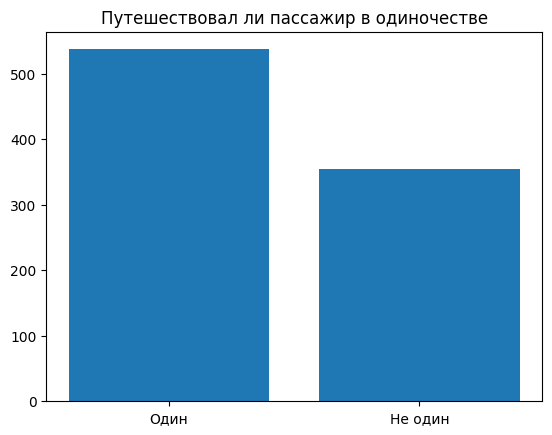

In [117]:
was_alone = df['alone'].value_counts()
plt.bar(['Один', 'Не один'], was_alone)
plt.title("Путешествовал ли пассажир в одиночестве")
plt.show()


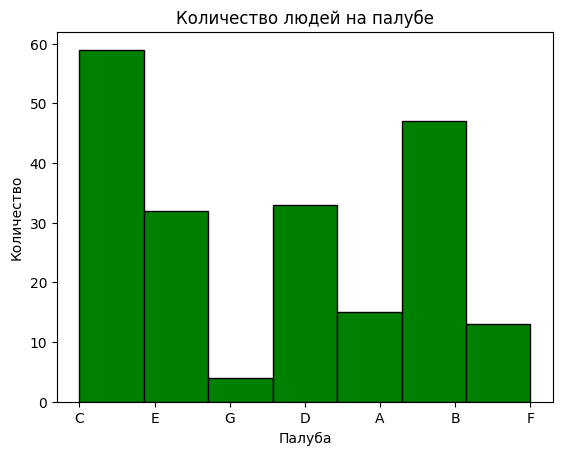

In [132]:
plt.hist(df['deck'].dropna(), bins=7, color='green', edgecolor='black')
plt.title("Количество людей на палубе")
plt.xlabel("Палуба")
plt.ylabel("Количество")
plt.show()

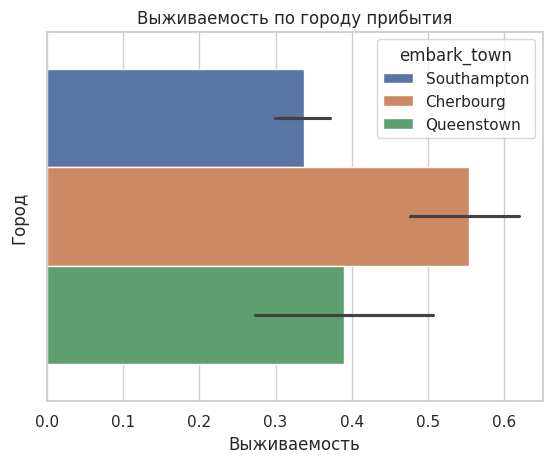

In [153]:
sns.set(style="whitegrid")
sns.barplot(data=df, x='survived', hue='embark_town')
plt.title("Выживаемость по городу прибытия")
plt.xlabel("Выживаемость")
plt.ylabel("Город")
plt.show()

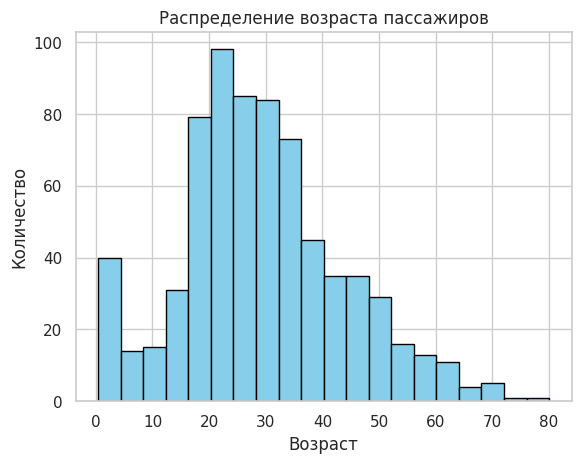

In [142]:
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

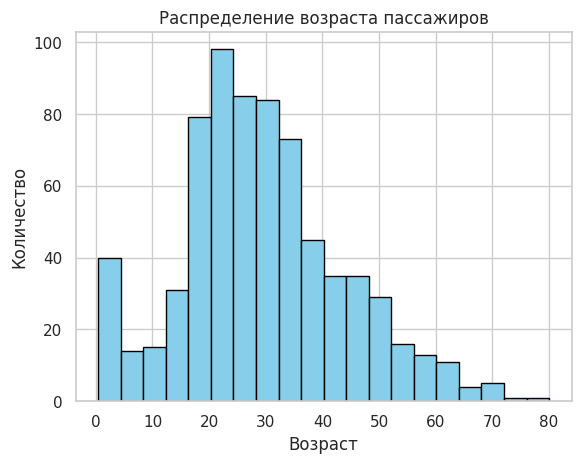

In [148]:
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

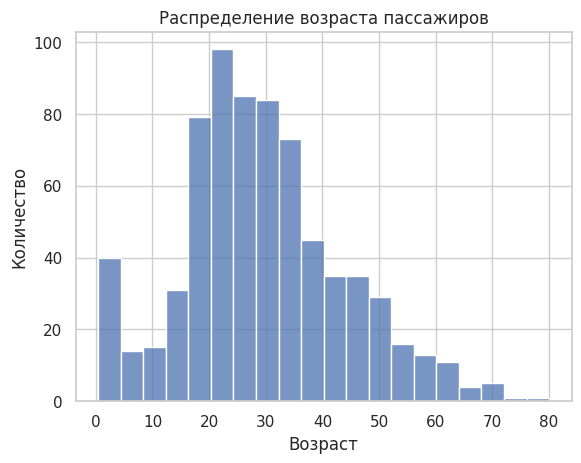

In [149]:
sns.histplot(data=df, x='age')
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

В Seaborn код проще и короче, а выводы не особо различаются.

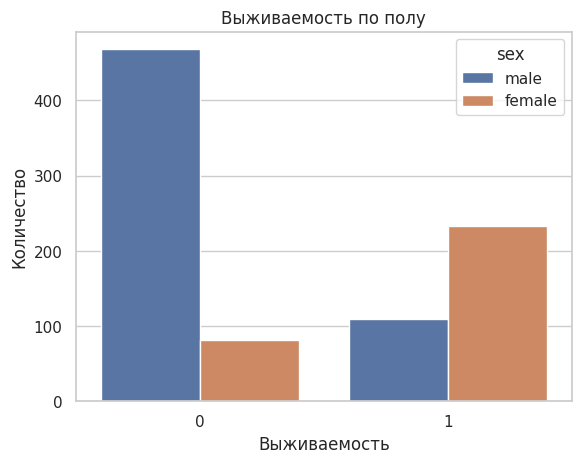

In [166]:
sns.countplot(data=df, x='survived', hue='sex')
plt.title("Выживаемость по полу")
plt.xlabel("Выживаемость")
plt.ylabel("Количество")
plt.show()

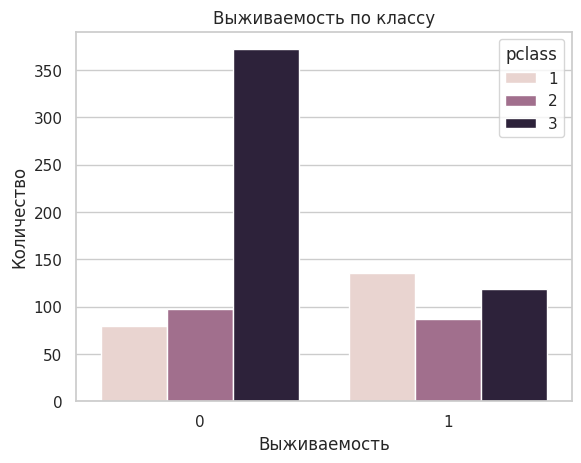

In [172]:
sns.countplot(data=df, x='survived', hue='pclass')
plt.title("Выживаемость по классу")
plt.xlabel("Выживаемость")
plt.ylabel("Количество")
plt.show()

Мужчин погибло гораздо больше чем женщин - это может быть связано с тем, что мужчины ставили безопасность женщин в приоритет над своей, жертвуя собой. Также пассажиров третьего класса погибло заметно больше остальных - это может объясняться тем, что каюты третьего класса находились на нижних палубах и располагались далеко от шлюпок.